In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mergers-and-acquisitions/mergers and acquisitions.csv


In [2]:
df = pd.read_csv("/kaggle/input/mergers-and-acquisitions/mergers and acquisitions.csv")
df.head

<bound method NDFrame.head of                    date   acquried_company            acquring_company  \
0     February 12, 2001            Dejavue               Google Groups   
1    September 20, 2001            Outride  Google Personalized Search   
2         February 2003          Pyra Labs                     Blogger   
3            April 2003  Neotonic Software        Google Groups, Gmail   
4            April 2003  Applied Semantics            AdSense, AdWords   
..                  ...                ...                         ...   
240    January 14, 2021             Fitbit                     Wear OS   
241       February 2021            Provino      Tensor processing unit   
242       April 5, 2021           Dysonics                  Pixel Buds   
243   September 3, 2021          Playspace            Google Workspace   
244    October 18, 2021             MuJoCo             Google DeepMind   

                             business        country           price  
0         

In [3]:
df.columns

Index(['date', 'acquried_company', 'acquring_company', 'business', 'country',
       'price'],
      dtype='object')

In [4]:
df['business'].unique

<bound method Series.unique of 0                                Usenet
1                     Web search engine
2                       Weblog software
3      Customer relationship management
4                    Online advertising
                     ...               
240                           Wearables
241                      Cloud hardware
242                      Audio hardware
243                  Collaboration tool
244                  Robotics simulator
Name: business, Length: 245, dtype: object>

In [5]:
import matplotlib
import matplotlib.pyplot as plt 

In [6]:
#find the 5 most common industries in the dataset
df['business'].value_counts().head(5)

business
Online advertising           6
Mobile software              5
Social networking service    4
Security                     3
Weblog software              3
Name: count, dtype: int64

In [7]:
df.rename(columns={'business': 'industry'}, inplace=True)

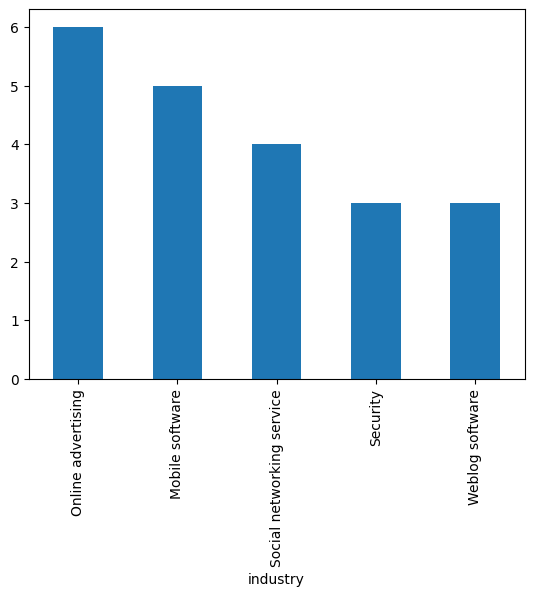

In [8]:
#now plot the price on the y axis and the business on the x axis
df['industry'].value_counts().head(5).plot(kind='bar')
plt.show()

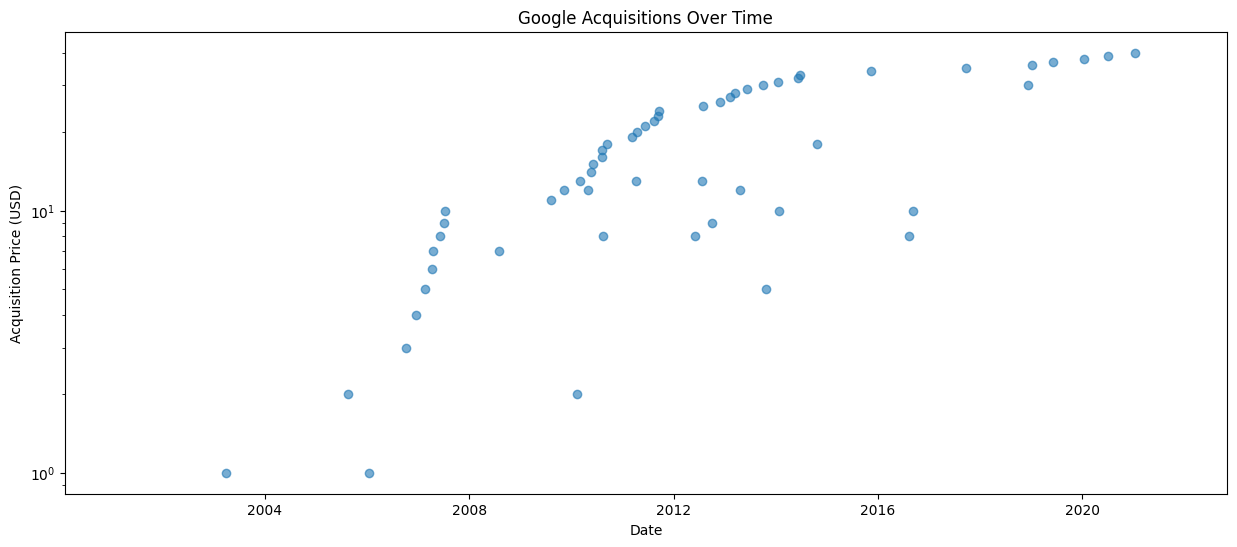

In [9]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='mixed')

# Sort by date
df = df.sort_values('date')

# Plot acquisition timeline
plt.figure(figsize=(15, 6))
plt.scatter(df['date'], df['price'], alpha=0.6)
plt.title('Google Acquisitions Over Time')
plt.xlabel('Date')
plt.ylabel('Acquisition Price (USD)')
plt.yscale('log')  # Use log scale for better visibility of smaller acquisitions
plt.show()

In [10]:
# Create a function to categorize business types
def categorize_business(business):
    if 'search' in business.lower() or 'analytics' in business.lower() or 'advertising' in business.lower():
        return 'Web Services'
    elif 'android' in business.lower() or 'mobile' in business.lower():
        return 'Mobile Technologies'
    elif 'video' in business.lower() or 'youtube' in business.lower():
        return 'Media and Content'
    elif 'social' in business.lower():
        return 'Social Networking'
    elif 'cloud' in business.lower():
        return 'Cloud Computing'
    elif 'ai' in business.lower() or 'artificial intelligence' in business.lower() or 'machine learning' in business.lower():
        return 'AI and ML'
    elif 'hardware' in business.lower() or 'device' in business.lower():
        return 'Hardware and Devices'
    elif 'security' in business.lower() or 'privacy' in business.lower():
        return 'Security and Privacy'
    else:
        return 'Other'

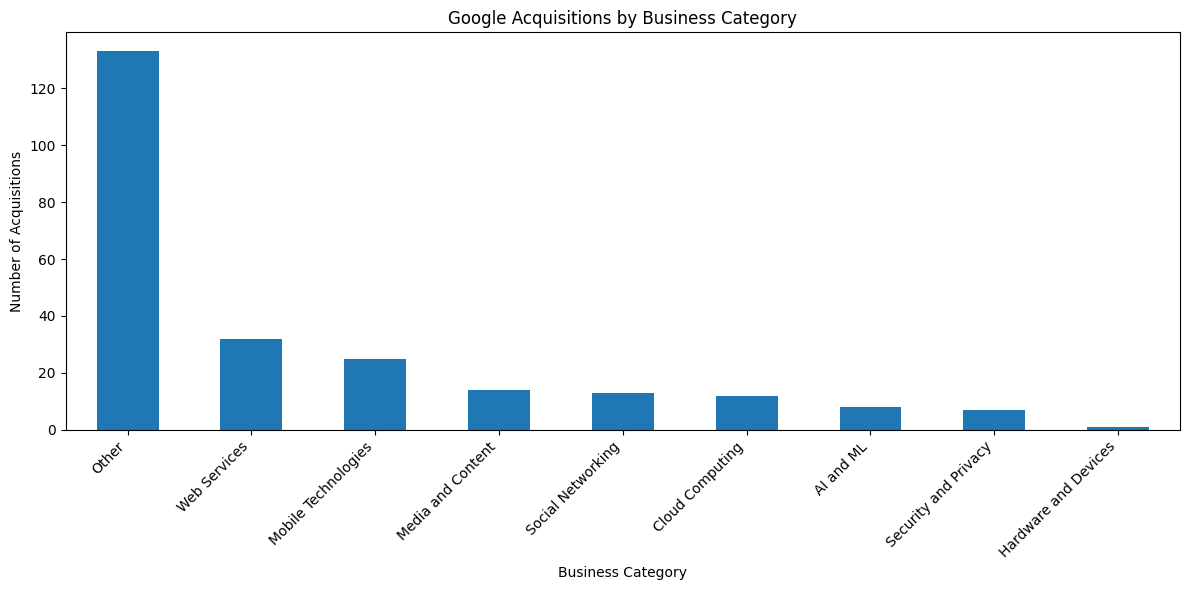

In [11]:
# Apply the categorization
df['category'] = df['industry'].apply(categorize_business)

# Count the number of acquisitions in each category
category_counts = df['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Google Acquisitions by Business Category')
plt.xlabel('Business Category')
plt.ylabel('Number of Acquisitions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
recent_years = 3
recent_acquisitions = df[df['date'] > df['date'].max() - pd.DateOffset(years=recent_years)]
recent_business_types = recent_acquisitions['industry'].value_counts()

print(f"Top business types in the last {recent_years} years:")
print(recent_business_types.head(10))

Top business types in the last 3 years:
industry
Big data, analytics             2
Education technology            1
Local retail inventory feeds    1
Collaboration tool              1
Audio hardware                  1
Cloud hardware                  1
Wearables                       1
Backup, Disaster Recovery       1
Chrome OS distribution          1
Cloud Assessment                1
Name: count, dtype: int64


In [13]:
from collections import Counter
import re

def word_frequency(text):
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

all_words = ' '.join(df['industry'])
word_freq = word_frequency(all_words)

print("Top 20 most frequent words in business descriptions:")
print(word_freq.most_common(20))

Top 20 most frequent words in business descriptions:
[('mobile', 22), ('software', 18), ('social', 16), ('online', 14), ('video', 14), ('cloud', 13), ('search', 12), ('advertising', 12), ('service', 11), ('and', 9), ('app', 8), ('management', 7), ('analytics', 7), ('security', 7), ('web', 6), ('engine', 6), ('platform', 6), ('recognition', 6), ('networking', 5), ('sharing', 5)]


In [14]:
df['year'] = df['date'].dt.year
for year in df['year'].unique():
    previous_year = df[df['year'] == year - 1]['industry'].unique()
    current_year = df[df['year'] == year]['industry'].unique()
    new_businesses = set(current_year) - set(previous_year)
    if new_businesses:
        print(f"New business types in {year}:")
        print(new_businesses)

New business types in 2001:
{'Web search engine', 'Usenet'}
New business types in 2003:
{'Customer relationship management', 'Blogging', 'Web search engine', 'Online advertising', 'Weblog software'}
New business types in 2004:
{'Map analysis', 'HTML editor', 'Traffic analysis', 'Image organizer'}
New business types in 2005:
{'Mobile operating system', 'Widget engine', 'Web analytics', 'Search engines', 'Mobile browser', 'Mobile software', 'Social networking service', 'Graphics library'}
New business types in 2006:
{'Computer vision', 'Advertising', 'Word processor', 'Weblog software', '3D modeling software', 'Online spreadsheets', 'Web application', 'Video sharing', 'Web search engine', 'Mapping'}
New business types in 2007:
{'Photo sharing', 'Microblogging', 'Computer security', 'Statistical software', 'Voice over IP', 'Videoconferencing', 'Communications security', 'In-game advertising', 'Web feed', 'Aerial photography', 'Social networking service', 'Presentation program', 'Parallel 

In [15]:
df['price'] = df['price'].replace('—', '0').str.replace('$', '').str.replace(',', '').astype(float)
business_value = df.groupby('category')['price'].sum().sort_values(ascending=False)

print("Total acquisition value by business category:")
print(business_value)

Total acquisition value by business category:
category
Mobile Technologies     1.259800e+10
Other                   1.025100e+10
Web Services            7.183000e+09
Media and Content       1.891200e+09
Social Networking       8.480000e+08
AI and ML               8.380000e+08
Security and Privacy    6.250000e+08
Cloud Computing         4.800000e+08
Hardware and Devices    0.000000e+00
Name: price, dtype: float64


In [16]:
# Create a function to categorize business types
def categorize_business(business):
    business = business.lower()
    if 'ai' in business or 'machine learning' in business or 'neural' in business:
        return 'AI/ML'
    elif 'cloud' in business:
        return 'Cloud Computing'
    elif 'robotics' in business or 'robot' in business:
        return 'Robotics'
    elif 'vr' in business or 'augmented reality' in business or 'ar' in business:
        return 'VR/AR'
    elif 'iot' in business or 'home automation' in business:
        return 'IoT/Smart Home'
    elif 'mobile' in business or 'android' in business:
        return 'Mobile Technologies'
    elif 'advertising' in business or 'ad' in business:
        return 'Advertising'
    elif 'social' in business or 'networking' in business:
        return 'Social Networking'
    else:
        return 'Other'

In [17]:
# Apply categorization
df['category'] = df['industry'].apply(categorize_business)

# Group by year and category, count acquisitions
df['year'] = df['date'].dt.year
yearly_category_counts = df.groupby(['year', 'category']).size().unstack(fill_value=0)

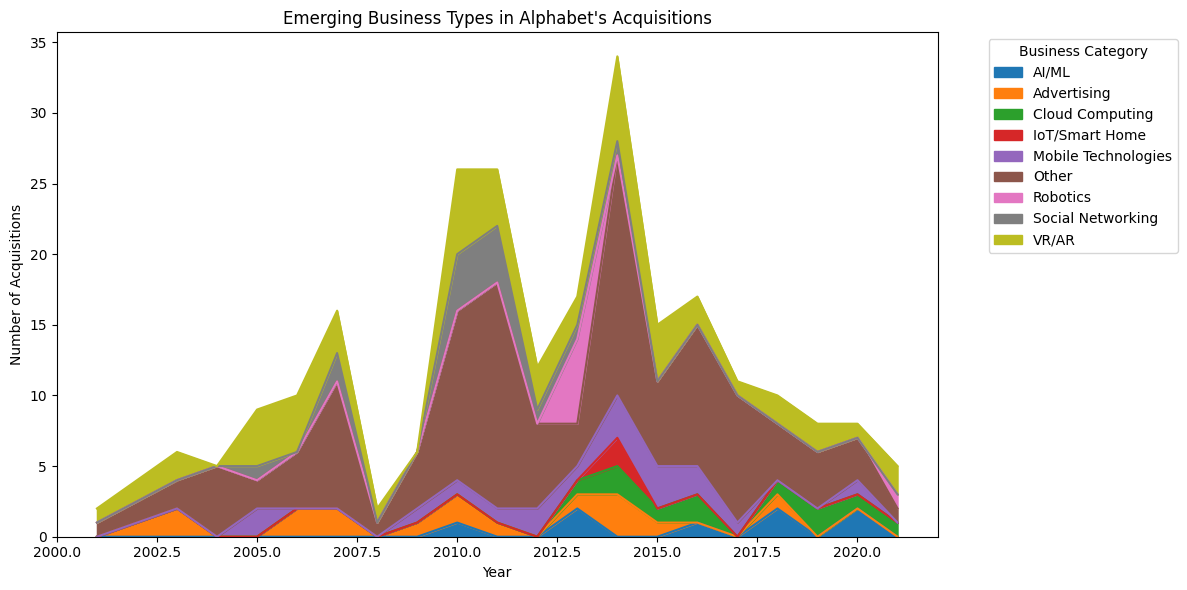

In [18]:
# Plot stacked area chart
yearly_category_counts.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Emerging Business Types in Alphabet\'s Acquisitions')
plt.xlabel('Year')
plt.ylabel('Number of Acquisitions')
plt.legend(title='Business Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()